# Water Quality Predictions

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing our dataset

Before we start analysing our dataset, we first convert it into a pandas dataframe: 

In [12]:
dataset = pd.read_csv('waterQuality1.csv')

Now lets have a look at the head of our dataframe: 

In [15]:
pd.set_option('display.max_columns', None)
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


We make several observations: 
- Our dataset contains 20 features of a specific water sample. 
- Each feature contains a continuous range of values. They must be greater or equal to 0. 
- The `is_safe` target variable either accepts a 1 value (water sample is safe to drink) or a 0 value (water sample is not safe for us to drink) making our problem to be a binary classification problem. 

We also want to see the number of observations of our dataset. Running the following code: 

In [8]:
dataset.shape

(7999, 21)

gives us information that this dataframe contains 7999 observations.

Finally let's have a look at the descriptive statistics of the features of our dataset:

In [16]:
dataset.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


Here, we make several interesting observations: 
- There does not seem to be missing values from all of our 20 features. 
- Each feature is numeric and each is greater than 0. 
- There are varying degrees of the size of each feature. As a result we might have to do feature scaling in order to conduct a machine learning model later. 

We now move on to conducting exploratory data analysis on our dataset.

### Exploratory Data Analysis (EDA)

### `is_safe` Target Variable

Firstly, we have a look at how the target variable behaves. 

There isn't much we can analyse in our `is_safe` target variable but we can count the number of observations that are classified as safe (1) and not safe (0).

In [18]:
dataset["is_safe"].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

As you can see there is the majority of values in our target variable column (`is_safe`) are valid (in that they are either 0 or 1) but there are 3 values that is invalid. 

The table below shows

In [33]:
data = dataset.loc[dataset["is_safe"] == "#NUM!"]
data.index

Int64Index([7551, 7568, 7890], dtype='int64')

A possible explanation why there could be an error of `#NUM!` in our `is_safe` column may be because there was a input error on Microsoft Excel. The same reason goes to why there was an error in `#NUM!` in our `ammonia` column. 
As a result because there is an invalid `is_safe` value for these observations we delete it from our dataset. 

In [35]:
dataset = dataset.drop(data.index)

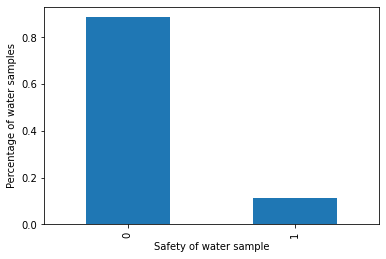

In [42]:
dataset["is_safe"].value_counts(normalize=True).plot(kind = "bar")
plt.xlabel("Safety of water sample")
plt.ylabel("Percentage of water samples")
plt.show()